# Задача 1

CPU times: user 2.63 ms, sys: 912 µs, total: 3.54 ms
Wall time: 2.78 ms
CPU times: user 1.52 ms, sys: 864 µs, total: 2.38 ms
Wall time: 1.72 ms


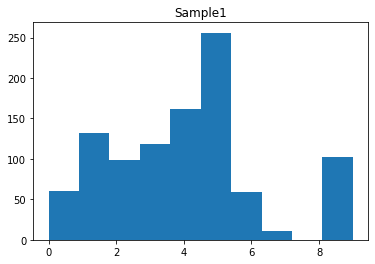

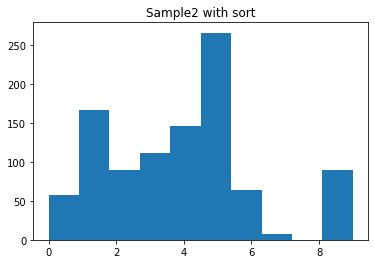

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import time

from operator import itemgetter
%matplotlib inline
N=1000

def generate_from0_to9(weights,N):
    mas_of_randoms=np.random.random(N)
    otv=np.zeros(N)
    for i in range(N):
        s=mas_of_weights[0]
        j=0
        while(s<mas_of_randoms[i]):
            s=s+mas_of_weights[j+1]
            j=j+1
        otv[i]=j
    return otv

def generate_from0_to9_with_sort(weights,N):
    
    dict_of_data={mas_of_weights[i]:i for i in range(10)}
    list_keys = list(dict_of_data.keys())
    list_keys.sort(reverse=True)
    new_chisla=np.zeros(10)
    for i in range(len(list_keys)):
        new_chisla[i]=dict_of_data[list_keys[i]]

    mas_of_randoms=np.random.random(N)
    otv=np.zeros(N)
    for i in range(N):
        s=list_keys[0]
        j=0
        while(s<mas_of_randoms[i]):
            s=s+list_keys[j+1]
            j=j+1
        otv[i]=new_chisla[j]
    return otv
    
mas_of_weights=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
mas_of_weights=mas_of_weights/mas_of_weights.sum()

%time data1 = generate_from0_to9(mas_of_weights,N)
%time data2 = generate_from0_to9_with_sort(mas_of_weights,N)

plt.hist(data1)
plt.title("Sample1")
plt.show()

plt.hist(data2)
plt.title("Sample2 with sort")
plt.show()


## Если отсортировать весы по убыванию, то генерация пройдет быстрее, так как вероятность попасть в самый большой отрезок самая большая и цикл в среднем будет работать меньше

# Задача 2

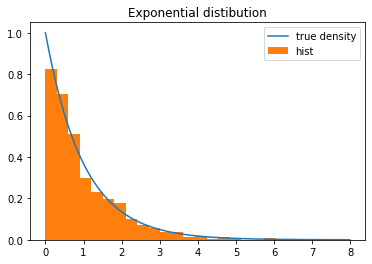

In [29]:
import numpy as np
import matplotlib.pyplot as plt
lamda=1
N=1000
K=300
Left_border=0
Right_border=8

mas_of_randoms = [np.random.rand() for i in range(N)]
observed_distribution=np.zeros(N)
for i in range(0,N):
    observed_distribution[i]=np.log(1-mas_of_randoms[i])/(-lamda)
    
true_density=np.zeros(N)
tmp=np.arange(0,8,0.01)
true_density=lamda*np.exp(-lamda*tmp)

plt.plot(tmp,true_density, label='true density')
plt.hist(observed_distribution,density=True,bins=20,label="hist")
plt.title("Exponential distibution")
plt.legend()
plt.show()

# Задача 3

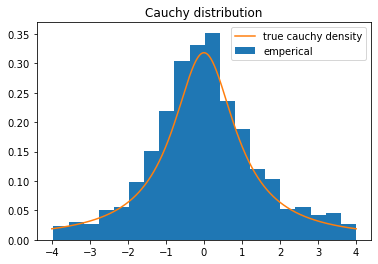

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
cauchy_distrib = stats.cauchy()
N=1000
C=4
def h_density(x):
    return 1/8

def f_density(x):
    return cauchy_distrib.pdf(x)
plotnost_x = np.linspace(-4, 4, N) 
plotnost_y=np.zeros(N)
for i in range(N):
    plotnost_y[i]=cauchy_distrib.pdf(plotnost_x[i])
    

fitting_x=np.zeros(N)
step=0
while(step<N):
    z=8*np.random.rand()-4 #uniform on [-4,4]
    u=np.random.rand()
    if (u<=f_density(z)/(C*h_density(z))):
        fitting_x[step]=z
        step=step+1
   
    
plt.hist(fitting_x,density=True,bins=20,label="emperical")
plt.plot(plotnost_x,plotnost_y, label="true cauchy density")
plt.title("Cauchy distribution")
plt.legend()
plt.show()


# Задача 4

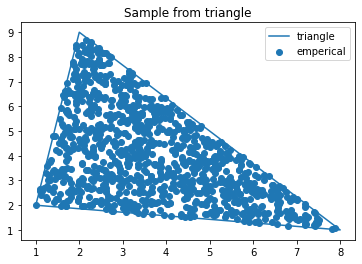

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math

triangle_x=[1,2,8,1]
triangle_y=[2,9,1,2]
N=1000

xrand = np.zeros(N)
yrand =np.zeros(N)
step=0

while(step<N):
    x=np.random.rand()
    y=np.random.rand()
    if y<=1-x:
        xrand[step]=x*5*np.sqrt(2)
        yrand[step]=y*5*np.sqrt(2)
    else:
        xrand[step]=(1-y)*5*np.sqrt(2)
        yrand[step]=(1-x)*5*np.sqrt(2)
        
    step=step+1
        
phi=np.arctan(-1/7)
mas_of_x=xrand*math.cos(phi)-yrand*math.sin(phi)+1  
mas_of_y=xrand*math.sin(phi)+yrand*math.cos(phi)+2
        
plt.scatter(mas_of_x,mas_of_y,label="emperical")
plt.plot(triangle_x,triangle_y,label="triangle")
plt.title("Sample from triangle")
plt.legend()
plt.show()

# Задача 5

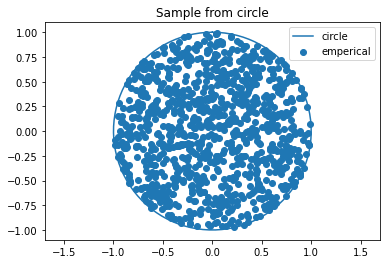

In [32]:
import numpy as np
from matplotlib.patches import Circle
import math
N=1000
 
t = np.linspace(0, 2 * np.pi, 100)
    
mas_of_phi=[2*np.pi*np.random.rand() for i in range(N)]
mas_of_r=[np.sqrt(np.random.rand()) for i in range(N)]

mas_of_x=np.zeros(N)
mas_of_y=np.zeros(N)
for i in range(N):
    mas_of_x[i]=mas_of_r[i]*math.cos(mas_of_phi[i])
    mas_of_y[i]=mas_of_r[i]*math.sin(mas_of_phi[i])
    
plt.scatter(mas_of_x,mas_of_y,label="emperical")
plt.plot(np.sin(t), np.cos(t),label='circle')
plt.axis('equal')
plt.title("Sample from circle")
plt.legend()
plt.show()

# Задача 6

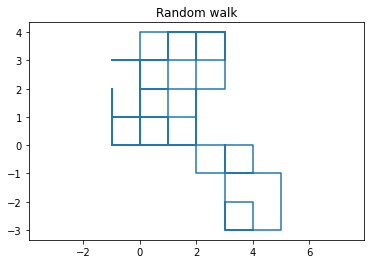

In [33]:
import numpy as np
from matplotlib.patches import Circle
import math

N=100

a_walk=np.ones(N)
b_walk=np.ones(N)
a_where_minus=np.random.choice(np.arange(N),N//2,replace=False)
b_where_minus=np.random.choice(np.arange(N),N//2,replace=False)
a_walk[a_where_minus]=-1
b_walk[b_where_minus]=-1

x_walk=(a_walk+b_walk)/2
y_walk=(a_walk-b_walk)/2

mas_of_x=np.zeros(N+1)
mas_of_y=np.zeros(N+1)
mas_of_x[0]=0
mas_of_y[0]=0

for i in range(1,N):
    mas_of_x[i]=mas_of_x[i-1]+x_walk[i-1]
    mas_of_y[i]=mas_of_y[i-1]+y_walk[i-1]
            
plt.plot(mas_of_x,mas_of_y)
plt.axis('equal')
plt.title("Random walk")
plt.show()

# Задача 7

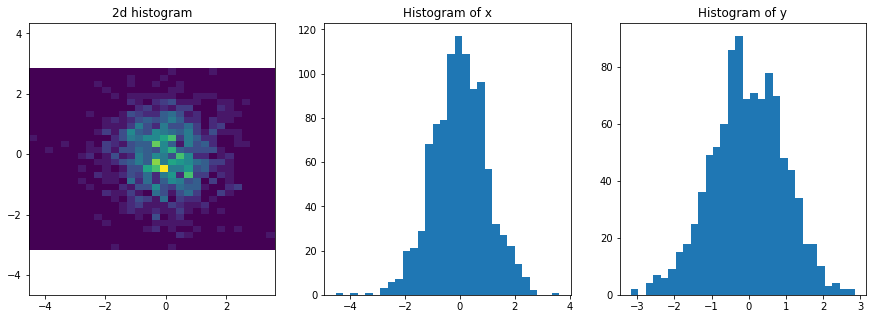

In [18]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

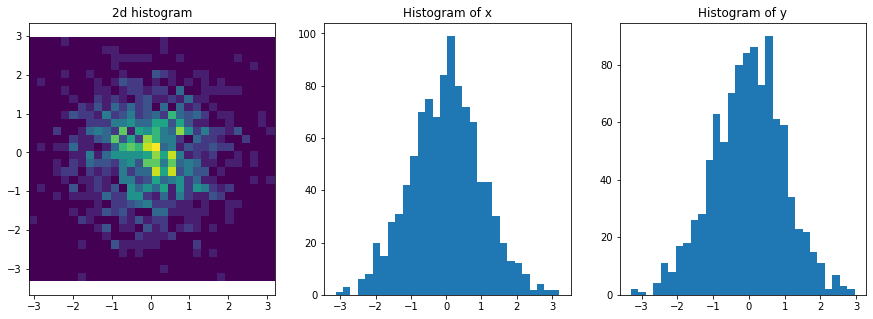

In [34]:
i = 0
cos = np.array([])
sin = np.array([])

while i<1000:
    u, v = 2*np.random.rand(2,1)-1
    s = u**2+v**2
    if 0<s<=1:
        cos = np.append(cos, u)
        sin = np.append(sin, v)
        i+=1

s = cos**2+sin**2
r = np.sqrt(-2 * np.log(s)/s)
x = cos * r
y = sin * r
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

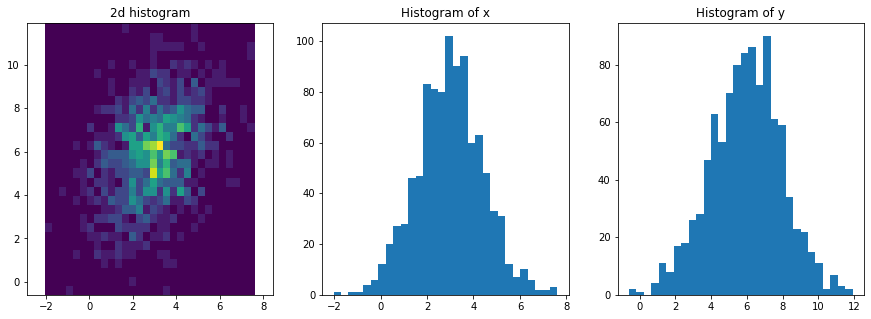

In [35]:
#Сведем задачу к предыдущей. Найдем линейную замену где данных случайных величин. Так как в многомерном
#гауссовском распределении матрица ковариционная матрица выглядит как АТА^t, то замена линейная выглядит как
#cov(x, y) = AtA. Найдем линейную замену, и найдем матрицу A. Итак, (Х У) = А(х у)
X = np.sqrt(7) / 2 * x + 1 / 2 * y + 3
Y = 2 * y + 6

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(X, Y, bins=30)
ax[0].axis('equal')
ax[1].hist(X, bins=30)
ax[2].hist(Y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

# Задача 8

In [36]:
import random
k = 0.0
for i in range(1000000):
    x = random.random()
    y = random.random()
    k += (x * x + y * y < 1.0)
print(4 * k / 1000000)

3.1401


# Задача 9

mean amount of colors= 28.588


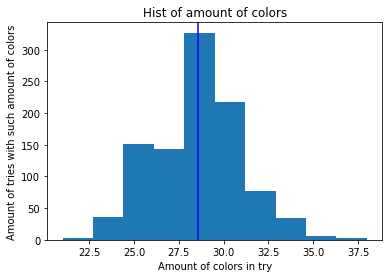

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math
N=100
tries=1000

def give_Bell_numbers(N):
    mas=np.zeros(N+1)
    mas[0]=1
    for n in range(1,N+1):
        s=0
        for k in range (0,n):
            s=s+mas[k]* math.factorial(n-1)/( math.factorial(k)* math.factorial(n-1-k))
        mas[n]=s
    return mas
def find_amount_of_colors(mas_of_weights,mas_of_values):
    K=np.random.choice(mas_of_values, None, True, mas_of_weights[1:]) 
    mas_of_col=np.zeros(N)
    for i in range(N):
        mas_of_col[i]=int(1+K*np.random.rand())
    return len(np.unique(mas_of_col))
    
Bell_numbers=np.zeros(N+1)
Bell_numbers= give_Bell_numbers(N)

mas_of_weights=np.zeros(N+1)
s=0
for k in range(1,N+1):
    mas_of_weights[k]=math.pow(k,N)/((math.e)*(math.factorial(k))*(Bell_numbers[N]))
    s=s+mas_of_weights[k]
mas_of_weights=mas_of_weights/s
mas_of_values=1+np.arange(N)

mas_of_tries=np.zeros(tries)
for i in range(tries):
    mas_of_tries[i]=find_amount_of_colors(mas_of_weights,mas_of_values)

print("mean amount of colors=",mas_of_tries.mean())
plt.hist(mas_of_tries)
plt.axvline(mas_of_tries.mean(),c='b')
plt.title("Hist of amount of colors")
plt.xlabel("Amount of colors in try")
plt.ylabel("Amount of tries with such amount of colors")
plt.show()